# Análise Exploratória de Dados

Toda fase que envolva *Data Science* é importante ter uma Análise Exploratória de Dados para que entenda o dado. Essa etapa é a que normalmente se consegue extrair diversos *insights*. Essa análise exploratória será justamente foca em geração de *insights*. Foi realizado uma vistória prévia em relação aos dados que serão utilizados para saber quais são os dados faltantes,visto isso a fonte dos dados e o foco desse *notebook* (geração de *insights*) não será realizada a limpeza de dados.

## Importando Bibliotecas

In [1]:
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import sys
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Carregando a Base de Dados

Os dados utilizados foram obtidos no site [consumidor.gov](https://www.consumidor.gov.br/), na parte de [Dados Abertos](https://www.consumidor.gov.br/pages/dadosabertos/externo/). Os arquivos são disponibilizados gratuitamente e em formato csv. Para esse *notebook* os dados utilizados foram referentes ao ano de 2020, até o mês de Novembro já que quando esse *notebook* foi confeccionado apenas até esse mês estava disponível. 

Para dar entrada nos dados foi utilizado a biblioteca Pandas, para alguns arquivos foi necessário colocar o *encoding* para que o arquivo fosse lido de forma correta visto que o seu *encoding* é diferente do comum do Pandas. 

In [2]:
janeiro = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-01.csv', encoding='latin-1', sep = ';')
fevereiro = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-02.csv', encoding='latin-1', sep = ';')
marco = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-03.csv', encoding='latin-1', sep = ';')
abril = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-04.csv', encoding='latin-1', sep = ';')
maio = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-05.csv', encoding='latin-1', sep = ';')
junho = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-06.csv', encoding='latin-1', sep = ';')
julho = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-07.csv',encoding='latin-1', sep = ';')
agosto = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-08.csv', sep = ';')
setembro = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-09.csv', sep = ';')
outubro = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-10.csv', sep = ';')
novembro = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-11.csv', sep = ';')

As colunas de todos os *Datasets* são iguais, por isso não se faz necessário fazer a visualização de todos os dados antes de começar fazer a análise de dados.

In [3]:
janeiro.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,S,PR,Curitiba,F,entre 31 a 40 anos,01/01/2020,10.0,Itaucard,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Cobrança / Contestação,"Cobrança de tarifas, taxas, valores não previs...",SMS / Mensagem de texto,N,S,Finalizada não avaliada,Não Avaliada,NaN,1
1,S,PR,São José dos Pinhais,F,entre 21 a 30 anos,01/01/2020,10.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Móvel,Contrato / Oferta,Alteração de plano/contrato sem solicitação ou...,Internet,N,S,Finalizada não avaliada,Não Avaliada,NaN,1
2,SE,ES,Serra,M,entre 41 a 50 anos,03/01/2020,9.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
3,SE,SP,Jundiaí,M,entre 31 a 40 anos,04/01/2020,9.0,Americanas.com,Comércio Eletrônico,Produtos Eletrodomésticos e Eletrônicos,"Eletroportáteis ( batedeira, liquidificador, u...",Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,N,S,Finalizada não avaliada,Não Avaliada,NaN,1
4,S,RS,Porto Alegre,M,entre 61 a 70 anos,07/01/2020,10.0,Banco BMG,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Pessoal e Demais Empréstimos (exceto f...,Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,1


In [4]:
janeiro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74357 entries, 0 to 74356
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Região                  74357 non-null  object 
 1   UF                      74357 non-null  object 
 2   Cidade                  74357 non-null  object 
 3   Sexo                    74357 non-null  object 
 4   Faixa Etária            74357 non-null  object 
 5   Data Finalização        74357 non-null  object 
 6   Tempo Resposta          73746 non-null  float64
 7   Nome Fantasia           74357 non-null  object 
 8   Segmento de Mercado     74357 non-null  object 
 9   Área                    74357 non-null  object 
 10  Assunto                 74357 non-null  object 
 11  Grupo Problema          74357 non-null  object 
 12  Problema                74357 non-null  object 
 13  Como Comprou Contratou  74357 non-null  object 
 14  Procurou Empresa        74357 non-null

In [5]:
datasets = [janeiro, fevereiro, marco, abril, maio, junho, julho, agosto, setembro, outubro, novembro]

In [6]:
datasets_2020 = pd.concat(datasets)
datasets_2020

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,S,PR,Curitiba,F,entre 31 a 40 anos,01/01/2020,10.0,Itaucard,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Cobrança / Contestação,"Cobrança de tarifas, taxas, valores não previs...",SMS / Mensagem de texto,N,S,Finalizada não avaliada,Não Avaliada,NaN,1.0
1,S,PR,São José dos Pinhais,F,entre 21 a 30 anos,01/01/2020,10.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Móvel,Contrato / Oferta,Alteração de plano/contrato sem solicitação ou...,Internet,N,S,Finalizada não avaliada,Não Avaliada,NaN,1.0
2,SE,ES,Serra,M,entre 41 a 50 anos,03/01/2020,9.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,1.0
3,SE,SP,Jundiaí,M,entre 31 a 40 anos,04/01/2020,9.0,Americanas.com,Comércio Eletrônico,Produtos Eletrodomésticos e Eletrônicos,"Eletroportáteis ( batedeira, liquidificador, u...",Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,N,S,Finalizada não avaliada,Não Avaliada,NaN,1.0
4,S,RS,Porto Alegre,M,entre 61 a 70 anos,07/01/2020,10.0,Banco BMG,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Pessoal e Demais Empréstimos (exceto f...,Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107242,N,PA,Ananindeua,F,entre 31 a 40 anos,2020-11-30,0.0,Serasa Experian,Bancos de Dados e Cadastros de Consumidores,Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Informação,"Dados pessoais ou financeiros consultados, col...",Internet,N,S,Finalizada avaliada,Resolvida,5.0,NaN
107243,SE,MG,Uberlândia,M,entre 21 a 30 anos,2020-11-30,0.0,Serasa Experian,Bancos de Dados e Cadastros de Consumidores,Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Informação,"Dados pessoais ou financeiros consultados, col...",Internet,N,S,Finalizada avaliada,Não Resolvida,3.0,NaN
107244,NE,RN,Equador,M,entre 31 a 40 anos,2020-11-30,0.0,Serasa Experian,Bancos de Dados e Cadastros de Consumidores,Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Informação,"Dados pessoais ou financeiros consultados, col...",Internet,N,S,Finalizada avaliada,Não Resolvida,1.0,NaN
107245,SE,RJ,Magé,M,entre 31 a 40 anos,2020-11-30,0.0,Serasa Experian,Bancos de Dados e Cadastros de Consumidores,Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Informação,"Dados pessoais ou financeiros consultados, col...",Internet,N,S,Finalizada avaliada,Não Resolvida,2.0,NaN


Foi utilizada a função "pd.concat()" para concatenar todos os dados, ou seja, foi feita uma junção de todos os dados em apenas uma variável. Como foi dito anteriormente as colunas de todos os *datasets* são iguais, portanto é fácil fazer a junção de todos os meses para ter uma base de dados única ao invés de toda sempre ser necessário ler arquivo por arquivo, isso facilita muito já que a análise desejada é de todos os meses do ano e não de um em específico. 

A função *concat* é muito útil e fácil de ser utilizada para diversas aplicações, como por exemplo, poderíamos desejar a interseção dos dados ao invés da união de todos, para fazer isso bastaria fazer uma pequena mudanção dentro da função e seria realizado. Isso facilita muito principalmente com um grande número de dados que seria impossível de realizar essa concateção de tabelas à mão. Para saber mais sobre essa função basta consultar a sua [documentação](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

Visto que essa análise está focando em *insights* foram definidas algumas hipóteses simples para que elas possam ser validadas com dado ou não. O interessante da Análise de Dados é que a medida que se trabalha com os dados irá ter cada vez mais ideias. A geração de hipóteses é sempre importante porque dessa forma saberá o que se desea obter através dos dados e se nesses dados tem todas as informações necessárias, caso não tenha todas as informações necessárias será necessário procurar outra fonte complementar ou então - se for trabalho para uma empresa - solicitar a pessoa responsável por colher os dados. Um ponto importante é que antes de testar as hipóteses é necessário ter algumas ideias dos dados que serão utilizados, para que assim seja possível gerar as hipóteses e os resultados.

## Número de Reclamações por Estado 

**Hipótese 1**: Os estados da região Sudeste (região mais populosa) são os estados que mais possuem reclamações registradas.

Essa Hipótese é feita com base de que se espera que os estados que tem mais pessoas também sejam os lugares que possuem maior número de reclamações. 

In [7]:
datasets_2020['UF'].value_counts(ascending=False)

SP    282922
MG    107443
PR     98727
RJ     93663
RS     76797
BA     60782
DF     45009
SC     42774
GO     32063
CE     29386
PE     28246
ES     27366
MS     22461
MA     20691
MT     20629
PI     18582
PA     13244
PB     11655
AM     10840
RN      8256
AL      7065
SE      5260
TO      5068
RO      4434
AC      3238
AP      1398
RR      1392
Name: UF, dtype: int64

A **Hipótese 1** é **falso**, não foi validado pelo fato de que o estado de que o terceiro estado que possui maior número de reclamações é o Paraná que não é um estado da região Sudeste. Mesmo que a hipótese não tenha sido validada é importante ver que 3 dos 4 estados da região Sudeste estão entre os quatro primeiros colocados com maior número de reclamações. 

## Quantidade de Reclamações por Sexo

**Hipótese 2**: Os homens fazem mais reclamações. 

In [8]:
datasets_2020['Sexo'].value_counts()

M    605094
F    474063
O       222
Name: Sexo, dtype: int64

A sigla "O" é referente e "outros sexos" para aquelas pessoas que não se identificam nem com o sexo feminino nem masculino.

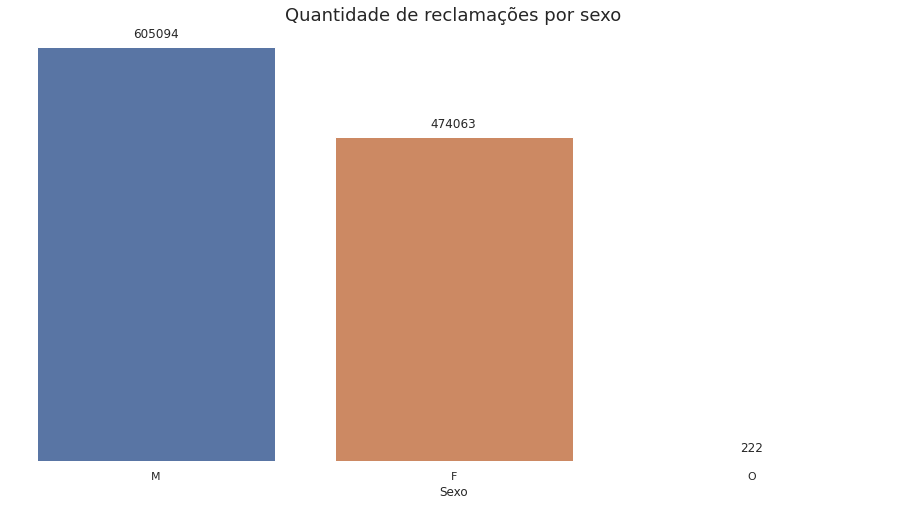

In [9]:
sns.set(style = 'whitegrid')
#sexo = datasets_2020[u'Sexo'].unique()[:-1]
cont = datasets_2020['Sexo'].value_counts()
fig, ax = plt.subplots(figsize = (16, 8))
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
graph = sns.barplot(x = ['M', 'F', 'O'], y = cont)
for i in range(0, len(cont)):
    plt.annotate(str(cont[i]), (i, cont[i] + 10000), ha = 'center', va = 'bottom')
plt.title('Quantidade de reclamações por sexo', fontsize = 18)
plt.xlabel('Sexo')
plt.grid(False)
plt.gca().axes.get_yaxis().set_visible(False);

A **hipótese 2** é verdadeira, realmente os homens fazem mais reclamações do que as demais opções de sexo. 

## Faixa Etária de Consumidores por Sexo

**Hipótese 3**: As pessoas mais consumidoras são as de até 40 anos.

In [10]:
datasets_2020.groupby('Sexo')['Faixa Etária'].value_counts(sort=False)

Sexo  Faixa Etária      
F     até 20 anos             9085
      entre 21 a 30 anos    118003
      entre 31 a 40 anos    140439
      entre 41 a 50 anos     78569
      entre 51 a 60 anos     60732
      entre 61 a 70 anos     46730
      mais de 70 anos        20505
M     até 20 anos            11353
      entre 21 a 30 anos    162752
      entre 31 a 40 anos    209913
      entre 41 a 50 anos    103997
      entre 51 a 60 anos     57262
      entre 61 a 70 anos     40741
      mais de 70 anos        19076
O     até 20 anos               10
      entre 21 a 30 anos        73
      entre 31 a 40 anos        54
      entre 41 a 50 anos        29
      entre 51 a 60 anos        21
      entre 61 a 70 anos        24
      mais de 70 anos           11
Name: Faixa Etária, dtype: int64

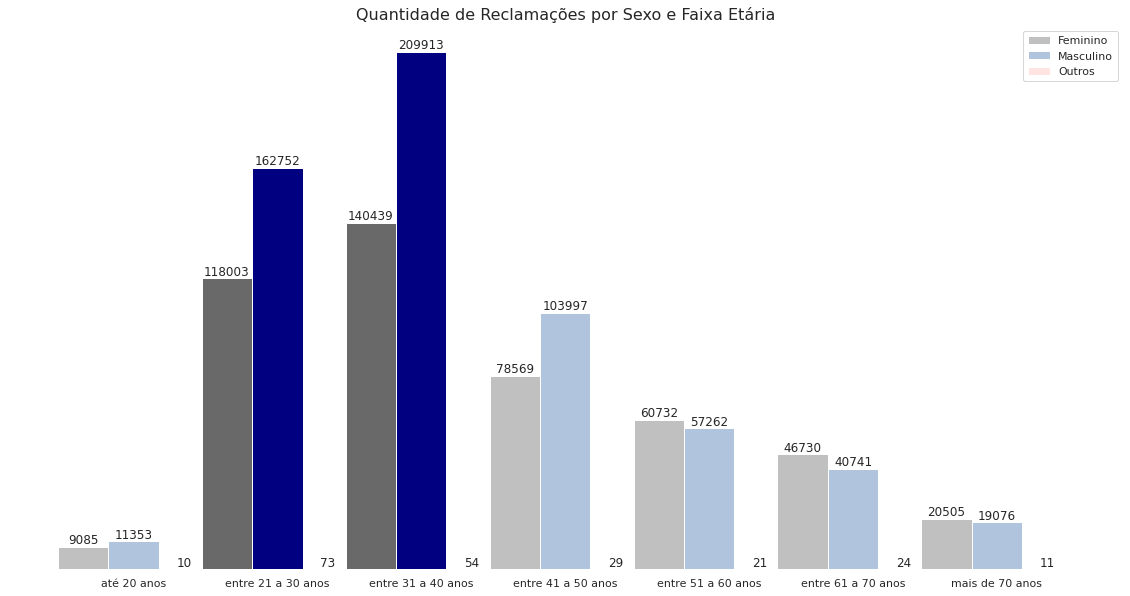

In [11]:
cont = datasets_2020.groupby('Sexo')['Faixa Etária'].value_counts(sort=False)
faixa_etaria = ['até 20 anos', 'entre 21 a 30 anos', 'entre 31 a 40 anos', 'entre 41 a 50 anos',
                'entre 51 a 60 anos', 'entre 61 a 70 anos', 'mais de 70 anos']
cores_para_feminino = ['silver', 'dimgray', 'dimgray', 'silver', 'silver', 'silver', 'silver']
cores_para_masculino = ['lightsteelblue', 'navy', 'navy', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue']
cores_para_outros = ['mistyrose', 'red', 'red', 'mistyrose', 'mistyrose', 'mistyrose', 'mistyrose']

barwidth = 0.35

fig, ax = plt.subplots(figsize = (20, 10))

#Definindo as posições das barras
r1 = range(int(len(cont)/3))
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]

#Criando as barras
graph1 = plt.bar(r1, cont[:7], width=barwidth, label = 'Feminino', color = cores_para_feminino)
graph2 = plt.bar(r2, cont[7:14], width=barwidth, label = 'Masculino', color = cores_para_masculino)
graph3 = plt.bar(r3, cont[14:], width=barwidth, label = 'Outros', color = cores_para_outros)

#Adicionando legenda as barras
plt.xticks([r + barwidth for r in range(int(len(cont)/3))], faixa_etaria)
plt.ylabel('Quantidade de Reclamações')
plt.title('Quantidade de Reclamações por Sexo e Faixa Etária', fontsize = 16)

#Melhorando visualização
plt.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
for i in range(int(len(cont)/3)):
    plt.annotate(str(cont[i]), (i, cont[i]), ha = 'center', va = 'bottom')
    plt.annotate(str(cont[i+7]), (i + barwidth, cont[i+7]), ha = 'center', va = 'bottom')
    plt.annotate(str(cont[i+14]), (i + 2 * barwidth, cont[i+14]), ha = 'center', va = 'bottom')
plt.gca().axes.get_yaxis().set_visible(False)

plt.legend()
plt.show()

A **Hipótese 3** é verdadeira visto que a faixa etária predominante de consumidores é realmente até os 40 anos, principalmente entre os 21 e 40 anos, onde apresenta o maior número de consumidores. 

Um ponto importante em relação ao gráfico é que os consumidores que se autoclassificaram como "outros" para a opção de gênero são pouquíssimos se comparado ao gênero feminino e masculino, por isso que a sua coloração nem aparece no gráfico já que a escala atrapalha a visualização, mas mesmo assim foi colocado os valores em cada uma das faixa etárias para que mostrasse a existência desses dados.

## Faixa Etária de Contratantes de Serviço pela internet

**Hipótese 4**: Os consumidores mais jovens são os que contratam mais serviços pela internet.

In [12]:
df2 = datasets_2020[datasets_2020["Como Comprou Contratou"] == 'Internet']
df2.groupby('Faixa Etária')['Como Comprou Contratou'].value_counts()

Faixa Etária        Como Comprou Contratou
até 20 anos         Internet                   12308
entre 21 a 30 anos  Internet                  149629
entre 31 a 40 anos  Internet                  171792
entre 41 a 50 anos  Internet                   72103
entre 51 a 60 anos  Internet                   33243
entre 61 a 70 anos  Internet                   15311
mais de 70 anos     Internet                    4632
Name: Como Comprou Contratou, dtype: int64

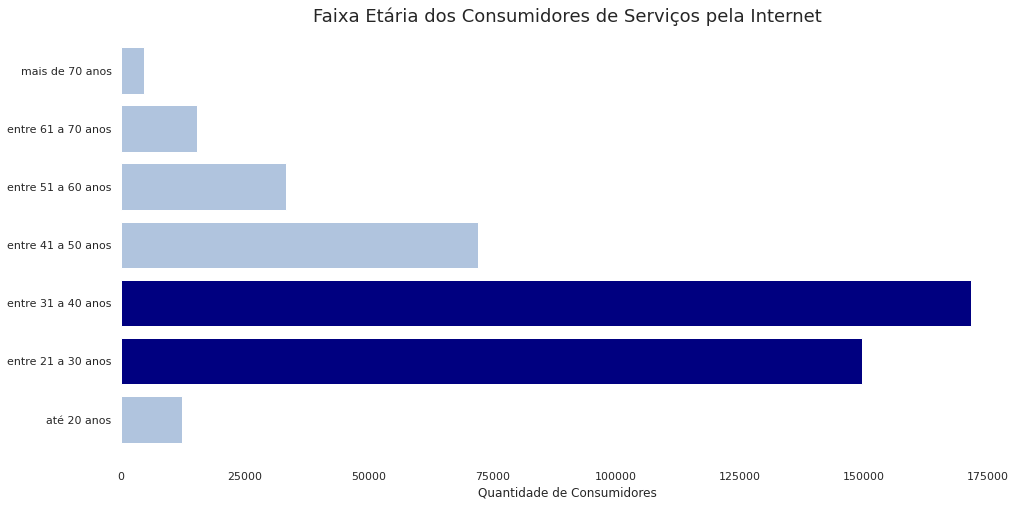

In [14]:
#Dados
cont = df2.groupby('Faixa Etária')['Como Comprou Contratou'].value_counts()
faixa_etaria = ['até 20 anos', 'entre 21 a 30 anos', 'entre 31 a 40 anos', 'entre 41 a 50 anos',
                'entre 51 a 60 anos', 'entre 61 a 70 anos', 'mais de 70 anos']
colors = ['lightsteelblue', 'navy', 'navy', 'lightsteelblue', 'lightsteelblue','lightsteelblue', 'lightsteelblue']

#Configuração do gráfico
fig, ax = plt.subplots(figsize = (16, 8))
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.barh(faixa_etaria, cont, color = colors)

plt.title('Faixa Etária dos Consumidores de Serviços pela Internet', fontsize = 18)
plt.xlabel('Quantidade de Consumidores')
plt.grid(False)

Percebe-se que a **Hipótese 4** é verdadeira. Os maiores consumidores pela internet são os mais jovens principalmente de 21 a 40 anos de idade, após essa faixa percebe-se a queda continua no número de consumidores pela internet. Isso já era esperado visto que essa faixa também é a faixa etária que possui o maior número de consumidores de forma geral, além disso a tendência é deu que as pessoas que já foram criadas utilizando a internet sejam também as pessoas que mais consumem a utilizando. 

## Procuram empresa antes de registrar a reclamação?

**Hipótese 5**: Pelo menos 80% dos maiores consumidores (faixa de 21 a 40 anos) procuram a empresa anttes de registrar a reclamação.

In [15]:
df3 = datasets_2020[(datasets_2020['Faixa Etária'] == 'entre 21 a 30 anos') | (datasets_2020['Faixa Etária'] == 'entre 31 a 40 anos')]
df3['Procurou Empresa'].value_counts()
porcentagem_registro_reclamacao = (df3['Procurou Empresa'].value_counts()[0]/df3['Procurou Empresa'].shape[0])*100
print(f'A porcentagem de pessoas na faixa etária de 21 a 40 anos que procuram a empresa antes de registrar a reclamação é de: {porcentagem_registro_reclamacao:.2f}%')

A porcentagem de pessoas na faixa etária de 21 a 40 anos que procuram a empresa antes de registrar a reclamação é de: 82.20%


A **Hipótese 5** é verdadeira 82,2 % das pessoas na faixa etária de 21 a 40 anos procuram as empresas antes de registrar as reclamações.

In [16]:
cont[0]

12308

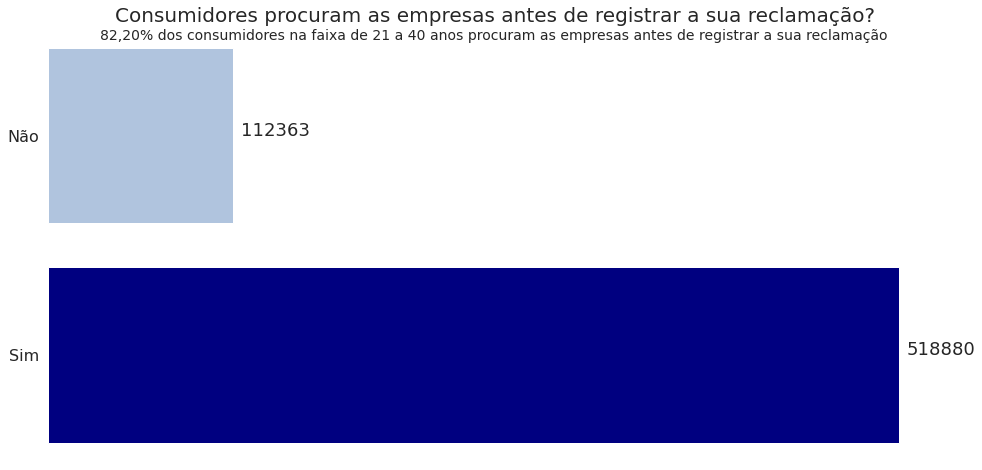

In [17]:
#Dados
cont = df3['Procurou Empresa'].value_counts()
colors = ['navy', 'lightsteelblue']

#Configuração do gráfico
fig, ax = plt.subplots(figsize = (16, 8))
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.barh(['Sim', 'Não'], cont, color = colors)

plt.annotate(str(cont[0]), (cont[0] + cont[0]*0.05, 0), ha = 'center', fontsize = 18)
plt.annotate(str(cont[1]), (cont[1] + cont[0]*0.05, 1), ha = 'center', fontsize = 18)

plt.title('Consumidores procuram as empresas antes de registrar a sua reclamação?', fontsize = 20)
plt.figtext(0.17, 0.86, '82,20% dos consumidores na faixa de 21 a 40 anos procuram as empresas antes de registrar a sua reclamação', fontsize = 14)

plt.yticks(fontsize = 16)
plt.grid(False)
plt.gca().axes.get_xaxis().set_visible(False)


## Problemas mais Constantes

**Hipótese 6**: O problema mais constante é em relação ao contrato das empresas.

In [18]:
datasets_2020['Grupo Problema'].value_counts()

Cobrança / Contestação    459030
Contrato / Oferta         193159
Atendimento / SAC         155546
Vício de Qualidade        135754
Entrega do Produto         67272
Informação                 62061
Saúde e Segurança           6569
Name: Grupo Problema, dtype: int64

O problema mais comum que é relatado é em relação a cobrança das empresas, isso faz com que a **hipótese 6** seja falsa. O segundo problema mais relatado que é em relaçao ao contrato.

Através da descoberta do grupo de problema mais relatado é possível fazer uma separação por problemas limitando apenas para esse grupo. Dessa forma se descobre que a maior parte das reclamações são referentes a cobranças indevidas e/ou abusivas, dificuldade na devolução dos valores pagos e cobranças por serviços que não foram contratados. 

In [19]:
datasets_2020[datasets_2020['Grupo Problema'] == 'Cobrança / Contestação']['Problema'].value_counts()

Cobrança indevida / abusiva para alterar ou cancelar o contrato                                           86411
Dificuldade / atraso na devolução de valores pagos / reembolso / retenção de valores                      76903
Cobrança por serviço/produto não contratado / não reconhecido / não solicitado                            68439
Cobrança de tarifas, taxas, valores não previstos / não informados                                        41546
Cobrança após cancelamento do serviço                                                                     22842
Renegociação / parcelamento de dívida                                                                     21519
Cobrança em duplicidade / Cobrança referente a pagamento já efetuado                                      19873
Cobrança por serviço não fornecido/ em desacordo com a utilização / fora do prazo                         17765
Dificuldade para obter boleto de quitação ou informações acerca de cálculos, pagamentos, saldo devedor  

## Quantidade de Reclamações por Segmento

**Hipótese 7**: O segmento que mais possui reclamações é o de telefonia.

In [20]:
datasets_2020['Segmento de Mercado'].value_counts()

Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    292250
Bancos, Financeiras e Administradoras de Cartão                            285783
Comércio Eletrônico                                                        109612
Transporte Aéreo                                                            58757
Bancos de Dados e Cadastros de Consumidores                                 47303
Empresas de Intermediação de Serviços / Negócios                            44965
Energia Elétrica                                                            37893
Empresas de Pagamento Eletrônico                                            33612
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática       20855
Viagens, Turismo, Hospedagem e Entretenimento                               15748
Corretoras e Sociedades de Seguros, Capitalização e Previdência             13786
Varejo                                                                      13349
Viagens, Turismo

In [21]:
tres_maiores_setores_reclamacoes = (datasets_2020['Segmento de Mercado'].value_counts()[:3].sum()/datasets_2020['Segmento de Mercado'].value_counts().sum())*100
print(f'''Na listagem há 50 empresas, os três maiores setores que possuem maior número de reclamações são: 
- Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura);
- Bancos, Financeiras e Administradoras de Cartão;
- Comércio Eletrônico.
Apenas esses três setores totalizam {tres_maiores_setores_reclamacoes:.2f}% das reclamações.''')

Na listagem há 50 empresas, os três maiores setores que possuem maior número de reclamações são: 
- Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura);
- Bancos, Financeiras e Administradoras de Cartão;
- Comércio Eletrônico.
Apenas esses três setores totalizam 63.71% das reclamações.


Realmente o setor que possui maior número de reclamações é o telefonia (telecomunicações), seguido dos bancos (e afins) e do comércio eletrônico, portanto a **hipótese 7** é verdadeira. 

Outra análise que foi feita em cima da constatação de quais são os setores que possuem maior número de reclamação foi o de quantos porcento as reclamações apenas dos três primeiros setores representam. O resultado obtido foi, de certa forma, surpreendente visto que 6% dos setores (os três maiores) representam 63,71% das reclamações, é uma fração muito pequena de setores para representar uma fração muito grande de reclamações. 

## Segmentos com mais Reclamações de Cobrança/Contestação

**Hipótese 8**: O setor de telecomunicações é o que possui maior número de reclamações de cobrança/contestação

In [22]:
segmento = datasets_2020[datasets_2020['Grupo Problema'] == 'Cobrança / Contestação']
segmento['Segmento de Mercado'].value_counts()

Bancos, Financeiras e Administradoras de Cartão                            157662
Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    145432
Energia Elétrica                                                            24363
Comércio Eletrônico                                                         22987
Transporte Aéreo                                                            18543
Empresas de Intermediação de Serviços / Negócios                            16537
Empresas de Pagamento Eletrônico                                            15425
Viagens, Turismo, Hospedagem e Entretenimento                                6806
Corretoras e Sociedades de Seguros, Capitalização e Previdência              5529
Bancos de Dados e Cadastros de Consumidores                                  5197
Viagens, Turismo e Hospedagem                                                4920
Agua e Saneamento                                                            4136
Empresas de Recu

Devido ao fato do setor de telecomunicações ser o setor que possui mais reclamações era esperado que ele também fosse o que possui mais reclamações no grupo mais recorrente de reclamações (Cobrança/Contestação), porém através dos resultados ficou comprovado que essa inferência é falsa e que, na verdade, o setor que possui mais reclamações de Cobrança/Contestação é o dos bancos. 

Essa análise mostra a necessidade da análise de dados, porque se fosse tirar conclusões apenas por inferências iria ser conclusões erradas. Isso ocorre muitas vezes em empresas reais, os líderes consideram que por ter muita experiência conseguem tirar decisões precisas sobre os resultados, mas isso nem sempre é verdade e mesmo se for verdade os dados sempre trazem informações relevantes para o negócio, ainda mais quando se consegue fazer previsões através da utilização de dados.

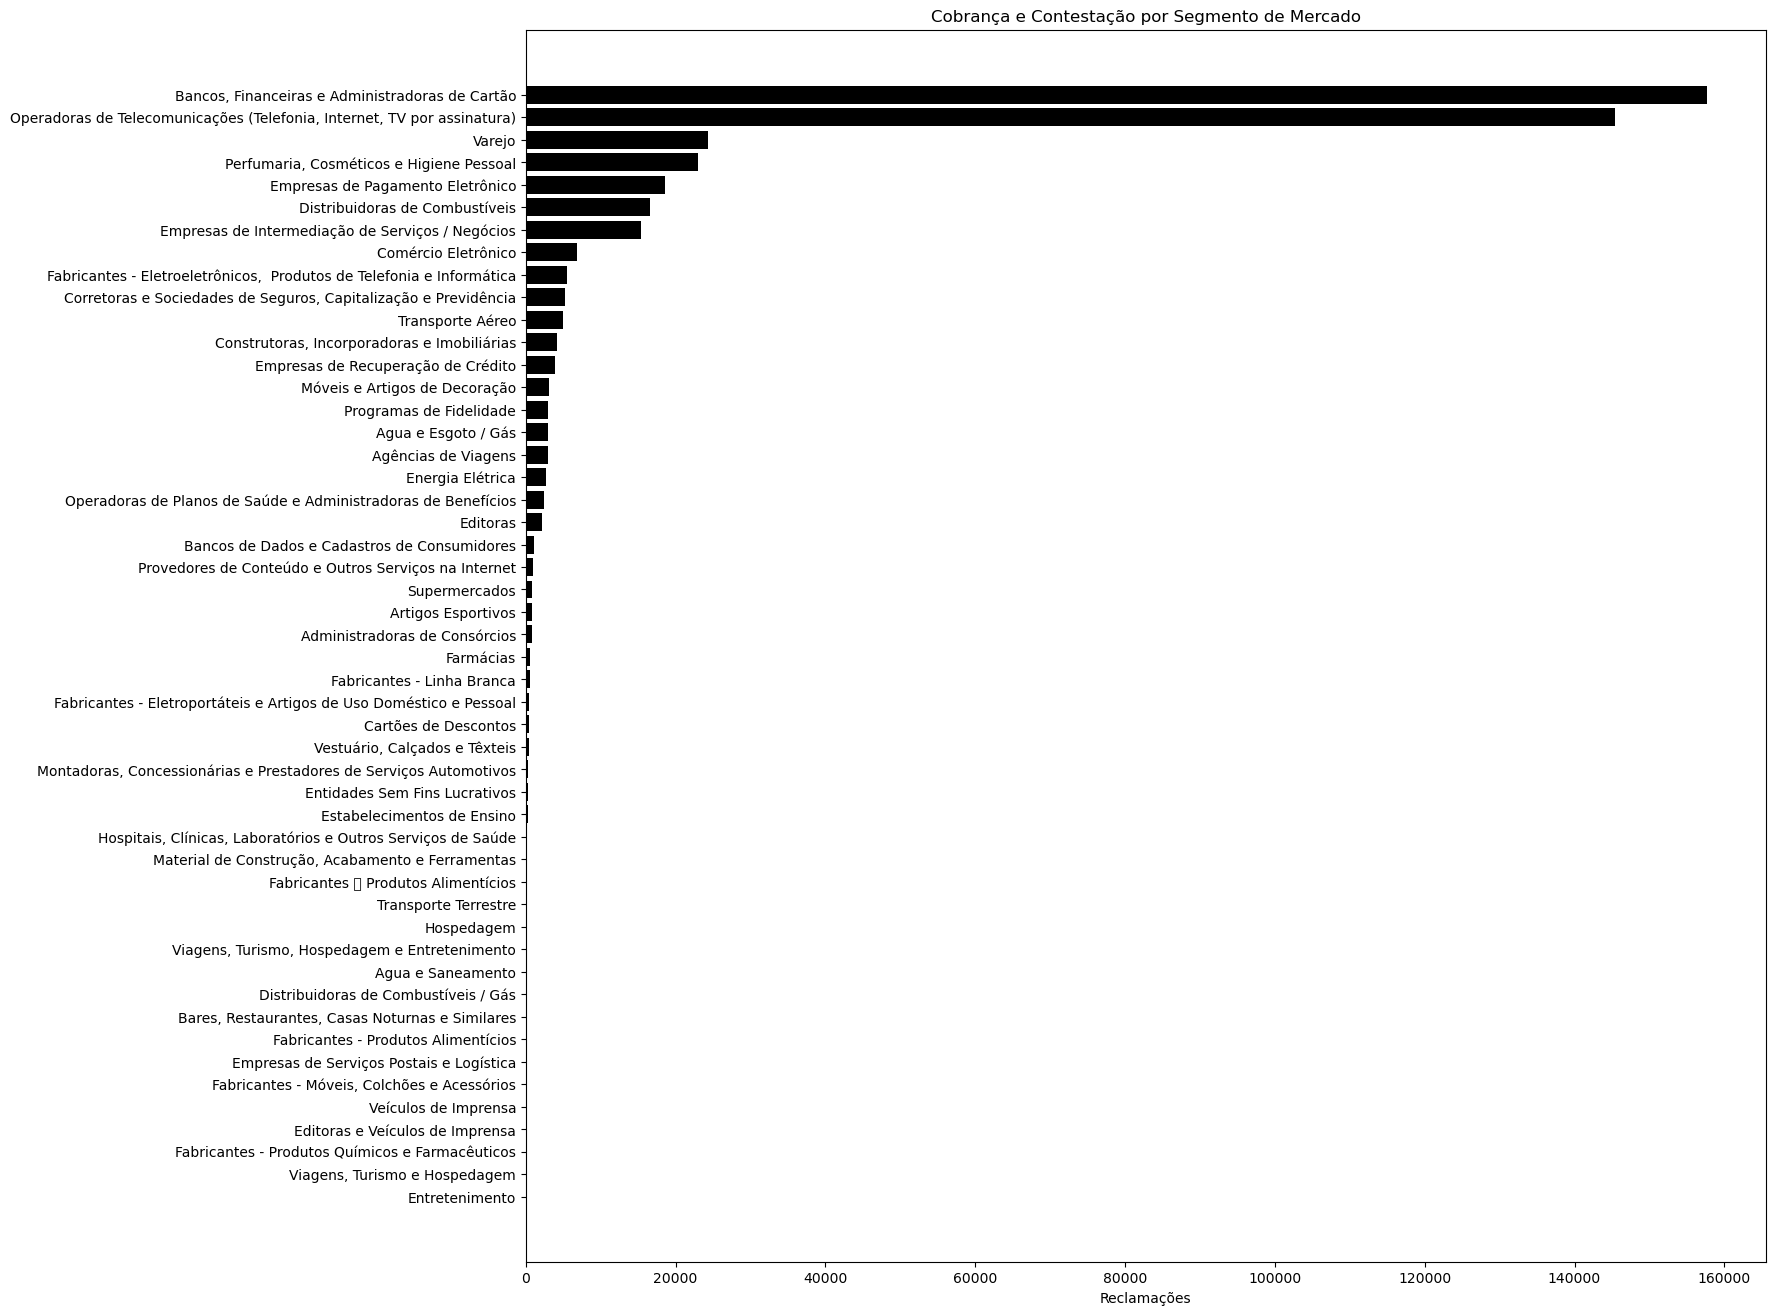

In [23]:
plt.style.use('ggplot')
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(16,16))

y_pos = np.arange(len(segmento['Segmento de Mercado'].value_counts()))
values = segmento['Segmento de Mercado'].value_counts()
segmentos = segmento['Segmento de Mercado'].unique()

ax.barh(y_pos, values, align = 'center', color = 'black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamações')
ax.set_title('Cobrança e Contestação por Segmento de Mercado')

plt.show()

Essa visualização gráfica não é muito recomendada de ser apresentada visto que ela possui muita informação e isso atrapalha a interpretação do leitor, porém está aqui com a função de mostrar a discrepância dos resultados em relação dos primeiros resultados para os demais. 

## 20 empresas com mais reclamações

**Hipótese 9**: Entre as 20 empresas com maior número de reclamações a Tim é a empresa predominante.

Tal hipótese foi levantada com relação ao ano anterior, 2019, onde, segundo o Procon, a Tim foi a empresa com mais reclamações.

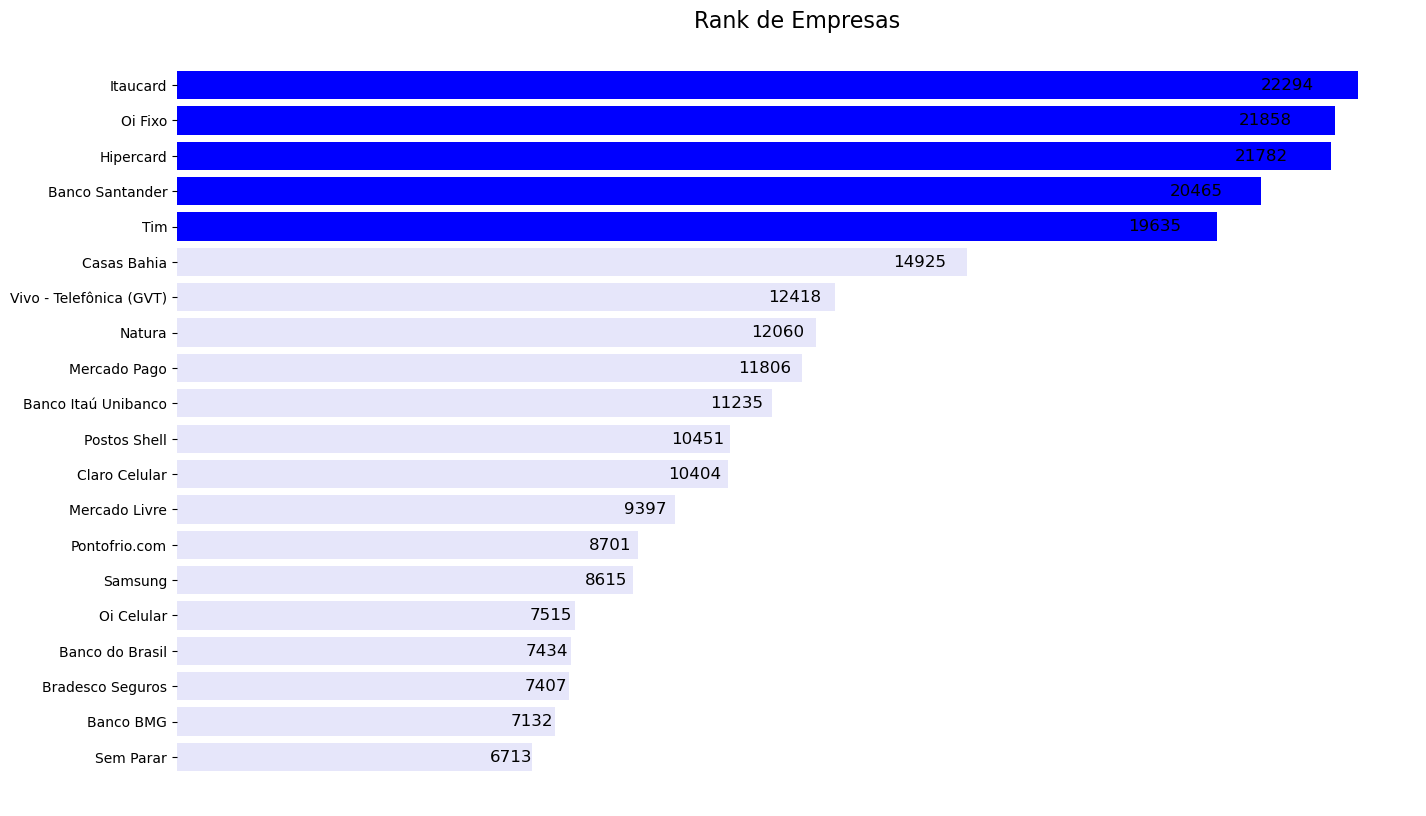

In [34]:
#Configurações iniciais
fig, ax = plt.subplots(figsize=(16, 10))
y = []
i = 0
while i < 21:
    if i < 5:
        y.append('blue')
    else:
        y.append('lavender')
    i += 1

#Dados
y_pos = np.arange(len(segmento['Nome Fantasia'].value_counts()[:20]))
values = segmento['Nome Fantasia'].value_counts()[:20]
segmentos = segmento['Nome Fantasia'].unique()[:20]

ax.barh(y_pos, values, align = 'center', color = y)
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamações')
ax.set_title('Rank de Empresas', fontsize = 16)

#Melhorando visualização
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
for i in range(len(values)):
    plt.annotate(str(values[i]), (values[i] - values[i]*0.06, i), ha = 'center', va = 'center', color = 'black', fontsize=12)
plt.gca().axes.get_xaxis().set_visible(False)

plt.show()

Percebe-se que a Tim não é mais a empresa com maior número de reclamações, portanto a *hipótese 9* é falsa. Agora a empresa predominante é o Itaucard, seguido pelo Oi Fixo, Hipercard, Banco Santander e em quinto lugar a Tim. Para afirmar se a Tim teve melhoria em número de reclamações de um ano para o outro é necessário pegar a base de dados do ano de 2019 e fazer a comparação, com a análise atual é possível apenas afirmar que em 2020 ela não foi a empresa predominante em número de reclamações.

## Tempo de Resposta

